# Examples using the SQL data source

In [1]:
%pylab inline
from config import db
from itertools import groupby

## ICD Groups

* http://apps.who.int/classifications/icd10/browse/2016/en

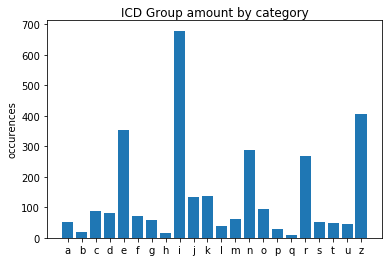

In [2]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT char, count(char)
    FROM (
        SELECT upper(substr(icd_3stellig,1,1)) as char 
        FROM icd
    )
    GROUP BY char
    ORDER BY char
''')
data = c.fetchall()
bar(range(len(data)), [row[1] for row in data])
ylabel('Occurences')
xlabel('Classification Group')
xticks(np.arange(len(data)) + .4, (row[0] for row in data))
title('ICD Group amount by category');

### Top 10 diseases in the biggest group

In [ ]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT icd_3stellig, icd_klarname, count(icd_3stellig)
    FROM icd
    WHERE lower(substr(icd_3stellig,1,1)) = 'i'
    GROUP BY icd_3stellig
    ORDER BY count(icd_3stellig) DESC
    LIMIT 10
''')
data = c.fetchall()
barh(range(len(data)), [row[2] for row in data], align='center')
yticks(range(len(data)), (row[1] for row in data))
xlabel('Occurences')
title('Most common diseases of the circulatory system');

### Specific ICD group example
Pregnancy related stuff has an ICD starting with 'O'.

* http://apps.who.int/classifications/icd10/browse/2016/en#/XV


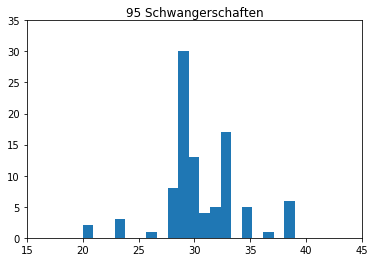

In [3]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag 
    FROM records LEFT OUTER JOIN icd USING (pat_neu)
    WHERE lower(substr(icd_3stellig,1,1)) = 'o'
    ORDER BY alter_in_jahren_am_aufnahmetag
''')
data = c.fetchall()
plt.title('{} Schwangerschaften'.format(len(data)))
plt.axis([15, 45, 0, 35])
plt.hist([row[0] for row in data], 20);

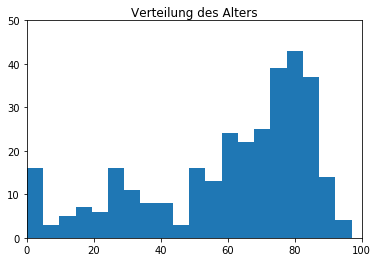

In [4]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag
    FROM records
''')
data = c.fetchall()
plt.title('Verteilung des Alters')
plt.axis([0, 100, 0, 50])
plt.hist([row[0] for row in data], 20);

In [5]:
c = db.cursor()
c.execute('''
    SELECT alter_in_jahren_am_aufnahmetag, icd_kode, icd_3stellig_klarname
    FROM records LEFT OUTER JOIN icd USING (pat_neu)
    WHERE alter_in_jahren_am_aufnahmetag > 50 
    AND icd_3stellig IN ("G47","N28") 
    ORDER BY alter_in_jahren_am_aufnahmetag
''')
data = np.asarray(c.fetchall())

print(data[:,0])

['56' '58' '58' '59' '60' '60' '60' '69' '69' '72' '75' '79' '79' '79' '79'
 '82' '86' '86' '91']


There exist many more data for older patients. The column to be used to determine the age depends on whether the person is older than 1 year.

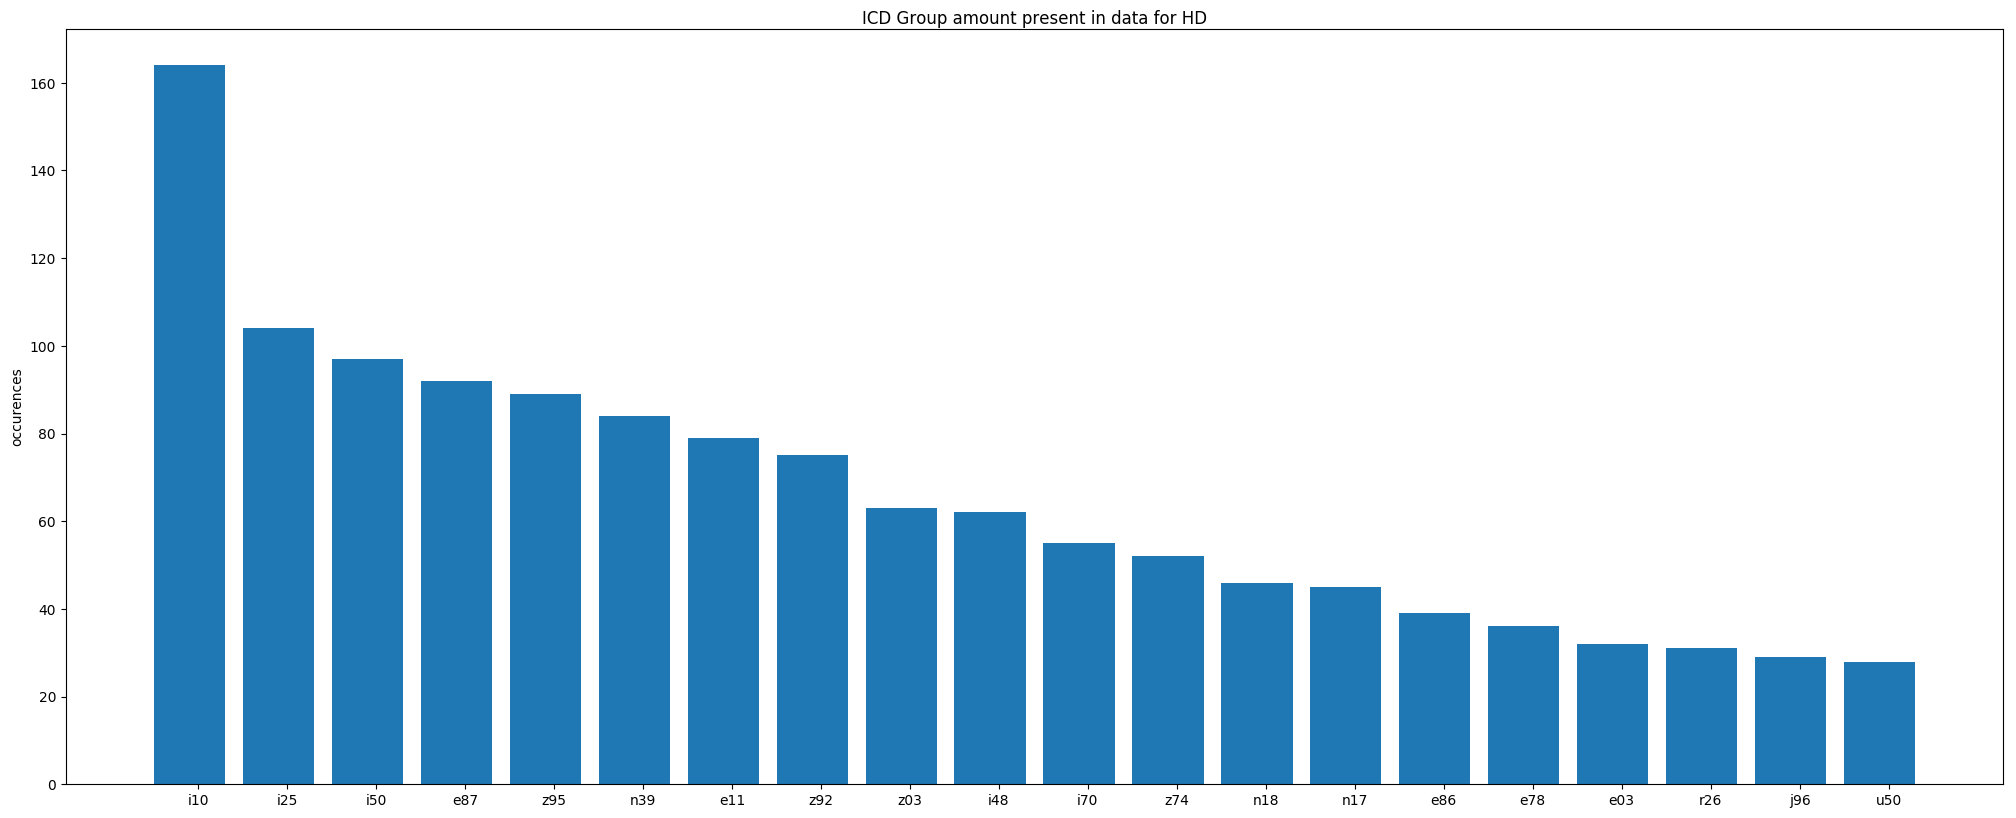

In [6]:
c = db.cursor()
c.execute('''
    SELECT DISTINCT char, count(char) as anz
    FROM (
        SELECT lower(substr(icd_3stellig,1,3)) as char, icd_3stellig_klarname as name
        FROM icd
        WHERE diagnoseart = "ND"
    )
    GROUP BY char
    ORDER BY anz desc
    LIMIT 20
''')
data = c.fetchall()
ind = np.arange(len(data))
fig = plt.figure(figsize=(25, 10), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.bar(ind, [row[1] for row in data])
ax.set_ylabel('occurences')
ax.set_title('ICD Group amount present in data for HD')
ax.set_xticks(ind + .5)
ax.set_xticklabels(row[0] for row in data);